In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
cd ..

/home/suriya/dcu/Group-Project


In [20]:
import os
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
from tqdm.notebook import tqdm

In [28]:
train_dir = 'data/tc4tl_training_data_v1/tc4tl/data/train/'
dev_dir = 'data/tc4tl_data_v5/tc4tl/data/dev/'
test_dir = 'data/tc4tl_data_v5/tc4tl/data/test/'

In [18]:
def get_devices(filepath, fileid):
    lines = open(filepath).read().split('\n')
    _, tx_device = lines[0].split(',')
    _, rx_device = lines[2].split(',')
    return { 'TX_Device' : tx_device, 'RX_Device' : rx_device, 'fileid' : fileid }

filename = os.listdir(train_dir)[0]
get_devices(os.path.join(train_dir, filename), filename)

{'TX_Device': 'iPhoneXR',
 'RX_Device': 'iPhone8Plus',
 'fileid': 'qcsvvfhe_tc4tl20.csv'}

In [21]:
def apply_on_folder(folder, fn):
    files = os.listdir(folder)
    return pd.DataFrame([ fn(os.path.join(folder, filename), filename)
                         for filename in tqdm(files, total=len(files)) ])

trainset = apply_on_folder(train_dir, get_devices)

  0%|          | 0/15552 [00:00<?, ?it/s]

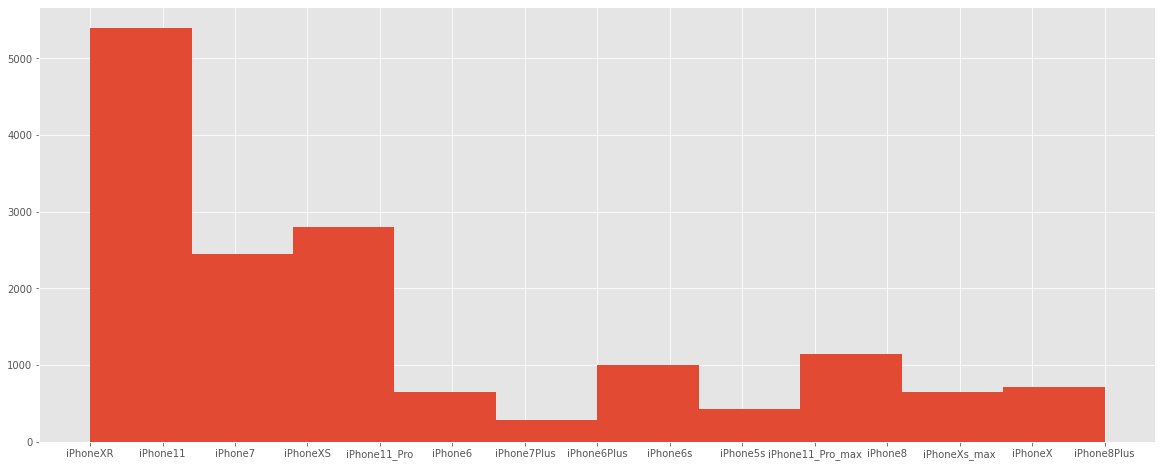

In [26]:
plt.figure(figsize=(20, 8))
trainset.TX_Device.hist();

In [29]:
devset = apply_on_folder(dev_dir, get_devices)
testset = apply_on_folder(test_dir, get_devices)

  0%|          | 0/935 [00:00<?, ?it/s]

  0%|          | 0/8423 [00:00<?, ?it/s]

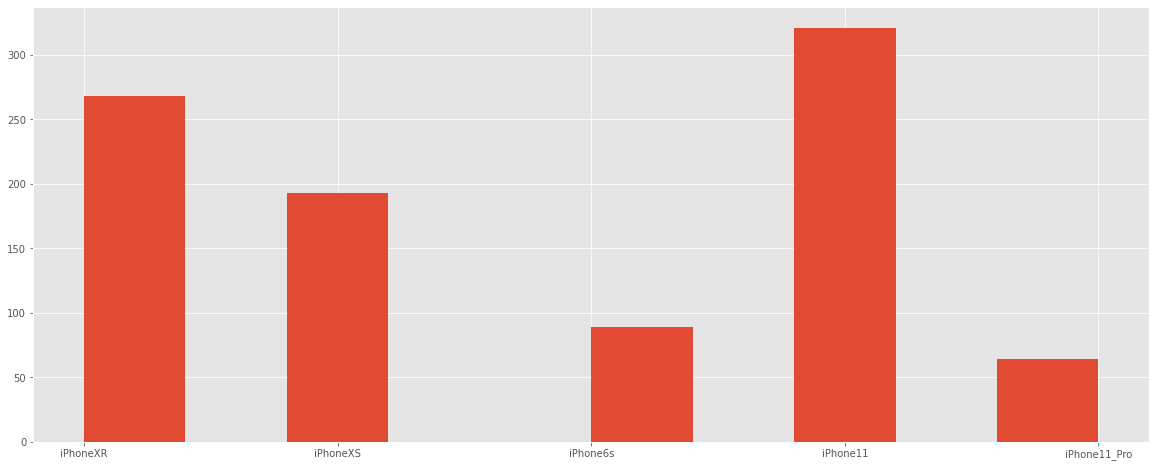

In [30]:
plt.figure(figsize=(20, 8))
devset.TX_Device.hist();

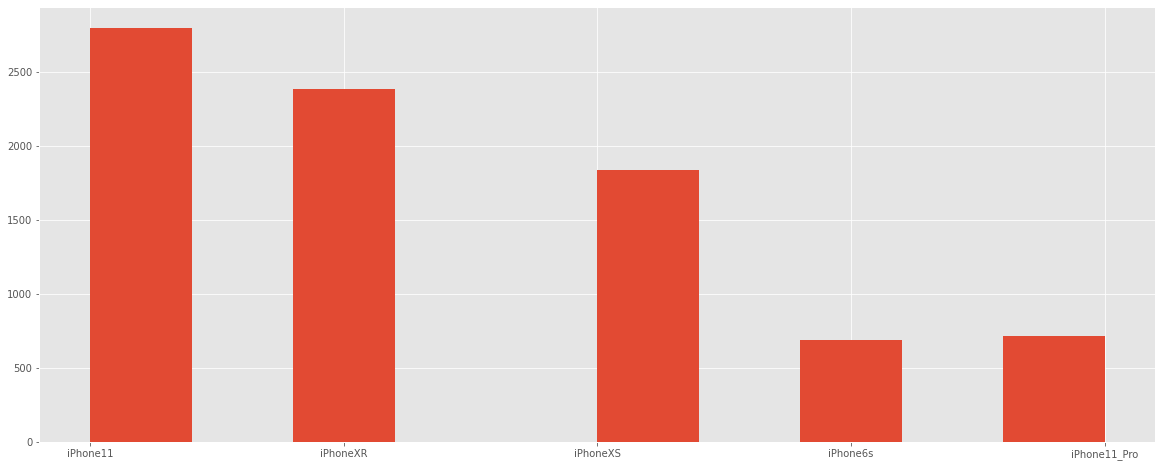

In [31]:
plt.figure(figsize=(20, 8))
testset.TX_Device.hist();

## Devices not in training set

In [42]:
dev_unique_devices = set(devset['TX_Device'].unique().tolist() + devset['RX_Device'].unique().tolist())
train_unique_devices = set(trainset['TX_Device'].unique().tolist() + trainset['RX_Device'].unique().tolist())
test_unique_devices = set(testset['TX_Device'].unique().tolist() + testset['RX_Device'].unique().tolist())
for device in list(dev_unique_devices) + list(test_unique_devices):
    if device not in train_unique_devices:
        print(device)

In [54]:
trainset.shape, sorted(trainset.TX_Device.unique().tolist())

((15552, 3),
 ['iPhone11',
  'iPhone11_Pro',
  'iPhone11_Pro_max',
  'iPhone5s',
  'iPhone6',
  'iPhone6Plus',
  'iPhone6s',
  'iPhone7',
  'iPhone7Plus',
  'iPhone8',
  'iPhone8Plus',
  'iPhoneX',
  'iPhoneXR',
  'iPhoneXS',
  'iPhoneXs_max'])

In [55]:
devices = sorted(devset.TX_Device.unique().tolist())
devset.shape, devices

((935, 3), ['iPhone11', 'iPhone11_Pro', 'iPhone6s', 'iPhoneXR', 'iPhoneXS'])

In [52]:
testset.shape, sorted(testset.TX_Device.unique().tolist())

((8423, 3), ['iPhone11', 'iPhone11_Pro', 'iPhone6s', 'iPhoneXR', 'iPhoneXS'])

In [79]:
rx_devices = sorted(devset.RX_Device.unique().tolist())
rx_devices

['iPhone11_Pro', 'iPhone11_Pro_max', 'iPhone6s', 'iPhone8', 'iPhoneXR']

In [80]:
'Test Set', sorted(testset.RX_Device.unique().tolist())

('Test Set',
 ['iPhone11_Pro', 'iPhone11_Pro_max', 'iPhone6s', 'iPhone8', 'iPhoneXR'])

In [81]:
'Training Set', sorted(trainset.RX_Device.unique().tolist())

('Training Set',
 ['iPhone11',
  'iPhone6',
  'iPhone7',
  'iPhone7Plus',
  'iPhone8',
  'iPhone8Plus',
  'iPhoneX',
  'iPhoneXR',
  'iPhoneXS',
  'iPhoneXs_max'])

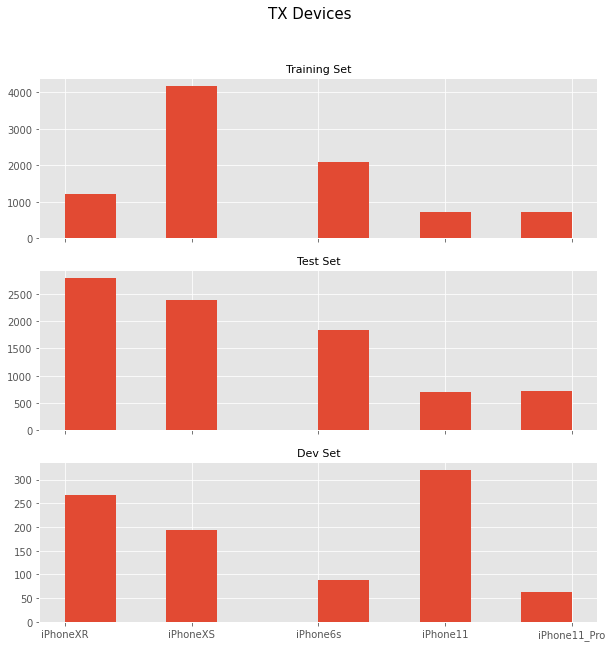

In [78]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True) 
axes = axes.flatten()
trainset[trainset.TX_Device.isin(devices)].TX_Device.hist(ax=axes[0]);
axes[0].set_title('Training Set', fontsize=11)
testset.TX_Device.hist(ax=axes[1]);
axes[1].set_title('Test Set', fontsize=11)
devset.TX_Device.hist(ax=axes[2]);
axes[2].set_title('Dev Set', fontsize=11);
fig.suptitle('TX Devices', fontsize=15);

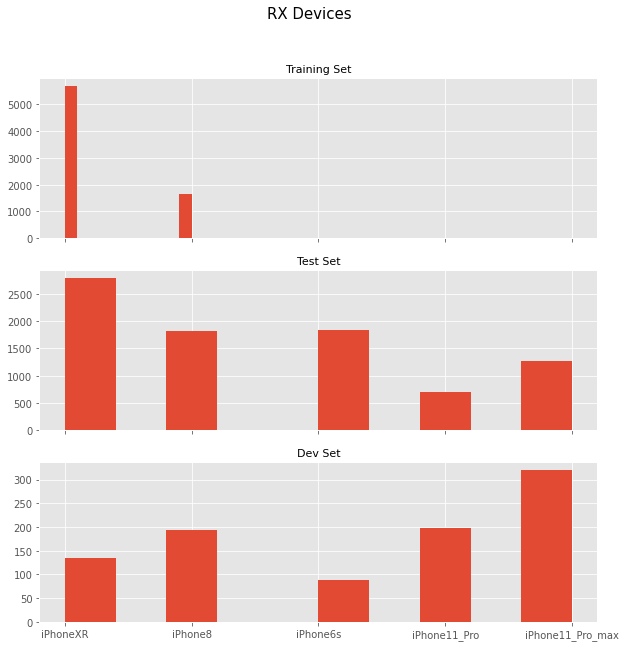

In [82]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True) 
axes = axes.flatten()
trainset[trainset.RX_Device.isin(rx_devices)].RX_Device.hist(ax=axes[0]);
axes[0].set_title('Training Set', fontsize=11)
testset.RX_Device.hist(ax=axes[1]);
axes[1].set_title('Test Set', fontsize=11)
devset.RX_Device.hist(ax=axes[2]);
axes[2].set_title('Dev Set', fontsize=11);
fig.suptitle('RX Devices', fontsize=15);

In [86]:
set(devices + rx_devices + trainset.TX_Device.unique().tolist() + trainset.RX_Device.unique().tolist())

{'iPhone11',
 'iPhone11_Pro',
 'iPhone11_Pro_max',
 'iPhone5s',
 'iPhone6',
 'iPhone6Plus',
 'iPhone6s',
 'iPhone7',
 'iPhone7Plus',
 'iPhone8',
 'iPhone8Plus',
 'iPhoneX',
 'iPhoneXR',
 'iPhoneXS',
 'iPhoneXs_max'}